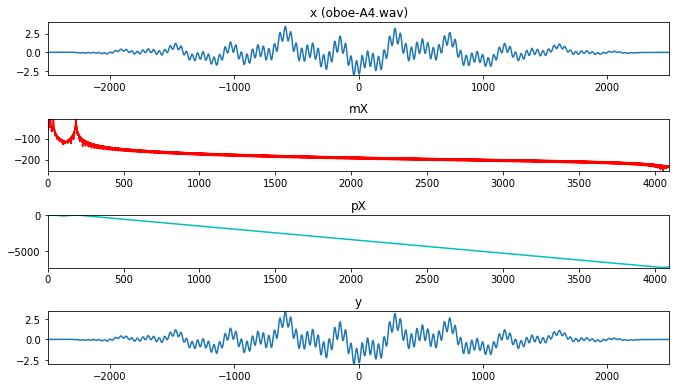

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time, os, sys

sys.path.append('../software/models/')

import dftModel as DFT
import utilFunctions as UF
from scipy.io.wavfile import read
from scipy.fftpack import fft, ifft
import math

#(fs, x) = UF.wavread('../sounds/oboe-A4.wav')
tt1 = np.arange(0, 1, 1./44100)
x = np.cos(2*np.pi*40*tt1) + np.cos(2*np.pi*100*tt1) + np.cos(2*np.pi*200*tt1) + np.cos(2*np.pi*1000*tt1)
w = np.hanning(5001)
N = 8192
pin = 5000
hM1 = int(math.floor((w.size+1)/2)) 
hM2 = int(math.floor(w.size/2))  
x1 = x[pin-hM1:pin+hM2]
mX, pX = DFT.dftAnal(x1, w, N)
y = DFT.dftSynth(mX, pX, w.size)*sum(w)

plt.figure(1, figsize=(9.5, 5.5))
plt.subplot(4,1,1)
plt.plot(np.arange(-hM1, hM2), x1*w, lw=1.5)
plt.axis([-hM1, hM2, min(x1), max(x1)])
plt.title('x (oboe-A4.wav)')

plt.subplot(4,1,2)
plt.plot(np.arange(mX.size), mX, 'r', lw=1.5)
plt.axis([0,mX.size,min(mX),max(mX)])
plt.title ('mX')

plt.subplot(4,1,3)
plt.plot(np.arange(pX.size), pX, 'c', lw=1.5)
plt.axis([0,pX.size,min(pX),max(pX)])
plt.title ('pX')

plt.subplot(4,1,4)
plt.plot(np.arange(-hM1, hM2), y, lw=1.5)
plt.axis([-hM1, hM2, min(y), max(y)])
plt.title('y')

plt.tight_layout()
plt.savefig('anal-synth.png')
plt.show()